,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all
count,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000
mean,0.202278,0.159714,0.117314,16.182991,15.826868,14.195064,17.288098,1018.396605,76.570715,2.672039,54.000908
std,0.349478,0.271792,0.176762,5.756972,6.264860,4.956014,6.164689,6.203379,16.268260,1.476158,40.553002
min,0.000000,0.000000,0.000000,0.320000,-2.190000,-0.640000,1.330000,994.000000,19.000000,0.060000,0.000000
25%,0.000000,0.000000,0.000000,12.080000,11.507500,10.720000,12.890000,1015.000000,66.000000,1.620000,7.000000
50%,0.000000,0.000000,0.000000,15.625000,15.230000,14.230000,16.260000,1018.000000,81.000000,2.400000,60.000000
75%,0.314000,0.288000,0.227000,19.270000,19.260000,17.490000,20.340000,1022.000000,91.000000,3.420000,98.000000
max,3.251000,6.978000,1.192000,40.850000,41.330000,36.720000,41.450000,1034.000000,100.000000,11.100000,100.000000


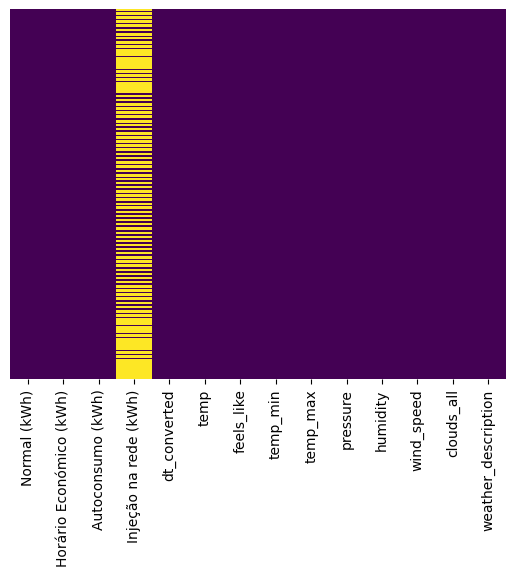

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

energia2022 = pd.read_csv('daasbstp2023/train/energia_202201-202212.csv', encoding='latin-1')    
energia2021 = pd.read_csv('daasbstp2023/train/energia_202109-202112.csv', encoding='latin-1')

energia2023_test = pd.read_csv('daasbstp2023/test/energia_202301-202304.csv', encoding='latin-1')

meteo2022 = pd.read_csv('daasbstp2023/train/meteo_202201-202212.csv', encoding='latin-1')
meteo2021 = pd.read_csv('daasbstp2023/train/meteo_202109-202112.csv', encoding='latin-1')

meteo2023_test = pd.read_csv('daasbstp2023/test/meteo_202301-202304.csv', encoding='latin-1')


# Converter datas
energia2021['Data'] = pd.to_datetime(energia2021['Data'], format='%Y-%m-%d')
energia2021['Hora'] = pd.to_datetime(energia2021['Hora'], format='%H')

energia2021['dt_converted'] = energia2021['Data'] + pd.to_timedelta(energia2021['Hora'].dt.hour, unit='h')

energia2021['dt_converted'] = pd.to_datetime(energia2021['dt_converted'], unit='s', utc=True)


energia2022['Data'] = pd.to_datetime(energia2022['Data'], format='%Y-%m-%d')
energia2022['Hora'] = pd.to_datetime(energia2022['Hora'], format='%H')

energia2022['dt_converted'] = energia2022['Data'] + pd.to_timedelta(energia2022['Hora'].dt.hour, unit='h')

energia2022['dt_converted'] = pd.to_datetime(energia2022['dt_converted'], unit='s', utc=True)


energia2023_test['Data'] = pd.to_datetime(energia2023_test['Data'], format='%Y-%m-%d')
energia2023_test['Hora'] = pd.to_datetime(energia2023_test['Hora'], format='%H')

energia2023_test['dt_converted'] = energia2023_test['Data'] + pd.to_timedelta(energia2023_test['Hora'].dt.hour, unit='h')

energia2023_test['dt_converted'] = pd.to_datetime(energia2023_test['dt_converted'], unit='s', utc=True)


meteo2021['dt_converted'] = pd.to_datetime(meteo2021['dt'], unit='s', utc=True)
meteo2022['dt_converted'] = pd.to_datetime(meteo2022['dt'], unit='s', utc=True)
meteo2023_test['dt_converted'] = pd.to_datetime(meteo2023_test['dt'], unit='s', utc=True)

# Merge datasets based on datetime
data21 = pd.merge(energia2021, meteo2021, on='dt_converted', how='inner')
data22 = pd.merge(energia2022, meteo2022, on='dt_converted', how='inner')

test = pd.merge(energia2023_test, meteo2023_test, on='dt_converted', how='outer')

# Drop columns
data21.drop('sea_level', axis=1, inplace=True)
data21.drop('grnd_level', axis=1, inplace=True)
data21.drop('rain_1h', axis=1, inplace=True)
data21.drop('Data', axis=1, inplace=True)
data21.drop('Hora', axis=1, inplace=True)
data21.drop('dt_iso', axis=1, inplace=True)
data21.drop('dt', axis=1, inplace=True)

data22.drop('sea_level', axis=1, inplace=True)
data22.drop('grnd_level', axis=1, inplace=True)
data22.drop('rain_1h', axis=1, inplace=True)
data22.drop('Data', axis=1, inplace=True)
data22.drop('Hora', axis=1, inplace=True)
data22.drop('dt_iso', axis=1, inplace=True)
data22.drop('dt', axis=1, inplace=True)

test.drop('sea_level', axis=1, inplace=True)
test.drop('grnd_level', axis=1, inplace=True)
test.drop('rain_1h', axis=1, inplace=True)
test.drop('Data', axis=1, inplace=True)
test.drop('Hora', axis=1, inplace=True)
test.drop('dt_iso', axis=1, inplace=True)
test.drop('dt', axis=1, inplace=True)

data21.drop('city_name', axis=1, inplace=True)
data22.drop('city_name', axis=1, inplace=True)
test.drop('city_name', axis=1, inplace=True)

train = pd.concat([data21, data22], axis=0)

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
train.describe()


# 2 - Datetime e Label Encoding

## Tratamento de datetime

In [3]:
# separar data em ano, mes e dia

train['ano'] = train['dt_converted'].apply(lambda x: x.year)
train['mes'] = train['dt_converted'].apply(lambda x: x.month)
train['dia'] = train['dt_converted'].apply(lambda x: x.day)
train['hora'] = train['dt_converted'].apply(lambda x: x.hour)

train['dia da semana'] = train['dt_converted'].apply(lambda x: x.weekday())

test['ano'] = test['dt_converted'].apply(lambda x: x.year)
test['mes'] = test['dt_converted'].apply(lambda x: x.month)
test['dia'] = test['dt_converted'].apply(lambda x: x.day)
test['hora'] = test['dt_converted'].apply(lambda x: x.hour)

test['dia da semana'] = test['dt_converted'].apply(lambda x: x.weekday())



In [4]:
test.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),dt_converted,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description,ano,mes,dia,hora,dia da semana
0,0.0,0.467,0.0,2023-01-01 00:00:00+00:00,12.93,12.76,12.72,13.43,1019.0,95.0,2.02,100.0,moderate rain,2023,1,1,0,6
1,0.0,0.577,0.0,2023-01-01 01:00:00+00:00,13.49,13.38,13.43,13.90,1018.0,95.0,2.18,100.0,moderate rain,2023,1,1,1,6
2,0.0,0.346,0.0,2023-01-01 02:00:00+00:00,13.55,13.44,13.48,14.82,1017.0,95.0,2.88,100.0,moderate rain,2023,1,1,2,6
3,0.0,0.270,0.0,2023-01-01 03:00:00+00:00,13.61,13.51,12.01,14.82,1016.0,95.0,3.63,100.0,moderate rain,2023,1,1,3,6
4,0.0,0.252,0.0,2023-01-01 04:00:00+00:00,13.59,13.49,12.01,14.82,1015.0,95.0,4.58,100.0,moderate rain,2023,1,1,4,6


In [5]:
train.drop('dt_converted', axis=1, inplace=True)
test.drop('dt_converted', axis=1, inplace=True)

## Label Encoding

In [6]:
lb_make = LabelEncoder()
train["weather_description"] = lb_make.fit_transform(train["weather_description"])
test["weather_description"] = lb_make.fit_transform(test["weather_description"])

train['weather_description'].unique()

array([5, 0, 1, 7, 6, 3, 4, 2])

In [7]:
train["Injeção na rede (kWh)"].unique()

array([nan, 'Low', 'Medium', 'High', 'Very High'], dtype=object)

In [8]:
dict_target = {"Low": 0, "Medium": 1, "High": 2, "Very High": 3}
train["Injeção na rede (kWh)"] = train["Injeção na rede (kWh)"].map(dict_target)

In [9]:
train.isnull().sum()

Normal (kWh)                  0
Horário Económico (kWh)       0
Autoconsumo (kWh)             0
Injeção na rede (kWh)      7777
temp                          0
feels_like                    0
temp_min                      0
temp_max                      0
pressure                      0
humidity                      0
wind_speed                    0
clouds_all                    0
weather_description           0
ano                           0
mes                           0
dia                           0
hora                          0
dia da semana                 0
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    3239 non-null   float64
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   pressure                 11016 non-null  int64  
 9   humidity                 11016 non-null  int64  
 10  wind_speed               11016 non-null  float64
 11  clouds_all               11016 non-null  int64  
 12  weather_description      11016 non-null  int32  
 13  ano                      11016 non-null  int64  
 14  mes                      110

## Correlação

<AxesSubplot: >

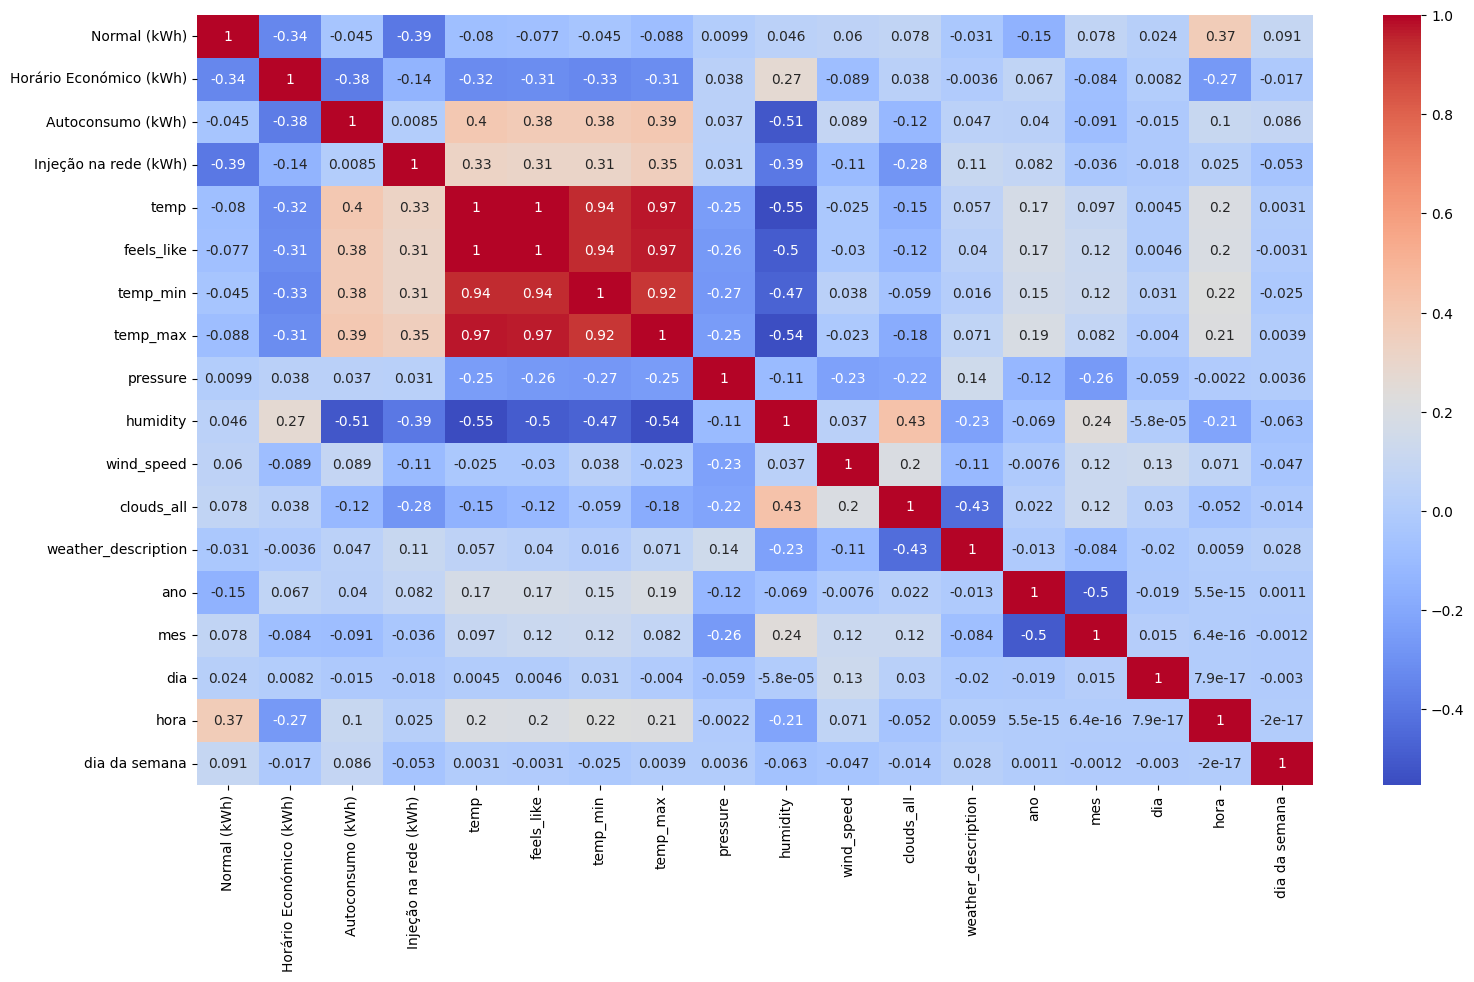

In [11]:
plt.subplots(figsize=(18,10))
train_corr = train.corr(method='pearson')
sns.heatmap(train_corr, annot = True, cmap='coolwarm')

In [16]:
train["Horário Económico (kWh)"].duplicated().sum()

10165

In [11]:
sns.pairplot(train)

ValueError: cannot reindex on an axis with duplicate labels

Error in callback <function flush_figures at 0x000001DF57BD0C10> (for post_execute):


,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description,ano,mes,dia,hora,dia da semana
count,11016.000000,11016.000000,11016.000000,3239.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000
mean,0.202278,0.159714,0.117314,1.581352,16.182991,15.826868,14.195064,17.288098,1018.396605,76.570715,2.672039,54.000908,4.374818,2021.795207,7.433551,15.803922,11.500000,3.004357
std,0.349478,0.271792,0.176762,0.940528,5.756972,6.264860,4.956014,6.164689,6.203379,16.268260,1.476158,40.553002,2.403911,0.403569,3.578335,8.835905,6.922501,1.994632
min,0.000000,0.000000,0.000000,0.000000,0.320000,-2.190000,-0.640000,1.330000,994.000000,19.000000,0.060000,0.000000,0.000000,2021.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,12.080000,11.507500,10.720000,12.890000,1015.000000,66.000000,1.620000,7.000000,3.000000,2022.000000,4.000000,8.000000,5.750000,1.000000
50%,0.000000,0.000000,0.000000,2.000000,15.625000,15.230000,14.230000,16.260000,1018.000000,81.000000,2.400000,60.000000,5.000000,2022.000000,8.000000,16.000000,11.500000,3.000000
75%,0.314000,0.288000,0.227000,2.000000,19.270000,19.260000,17.490000,20.340000,1022.000000,91.000000,3.420000,98.000000,7.000000,2022.000000,11.000000,23.000000,17.250000,5.000000
max,3.251000,6.978000,1.192000,3.000000,40.850000,41.330000,36.720000,41.450000,1034.000000,100.000000,11.100000,100.000000,7.000000,2022.000000,12.000000,31.000000,23.000000,6.000000


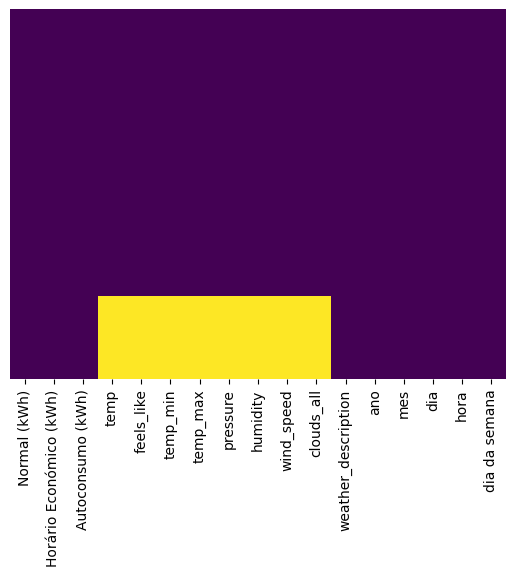

In [17]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')
train.describe()

In [18]:
test.tail()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description,ano,mes,dia,hora,dia da semana
2251,0.953,0.000,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2023,4,4,19,1
2252,0.915,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2023,4,4,20,1
2253,0.479,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2023,4,4,21,1
2254,0.000,0.497,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2023,4,4,22,1
2255,0.000,0.487,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2023,4,4,23,1
